In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import os.path
import matplotlib.patches as mpatches
import sqlite3
import datetime
import nltk
nltk.download('stopwords', quiet=True)
import plotly.express as px
from nltk.corpus import stopwords
from IPython.display import Image
from IPython.core.display import HTML
from wordcloud import WordCloud

from sqlalchemy import create_engine
from sqlalchemy.engine.reflection import Inspector

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

plt.rcParams["figure.figsize"] = (12, 8)

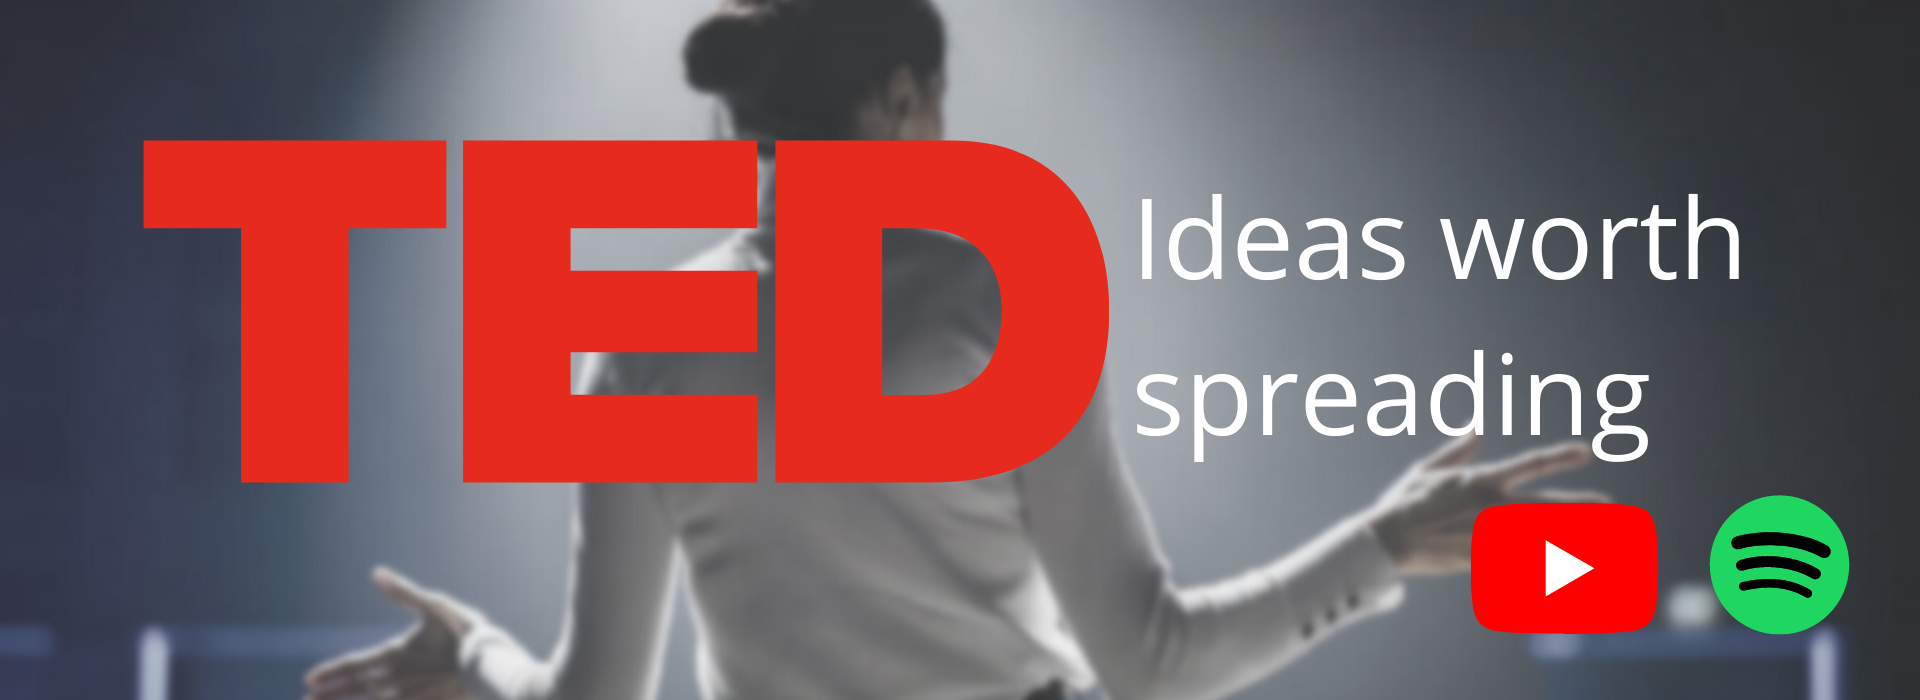

In [4]:
Image(filename="TED banner.png")

# Listening In: A Content Analysis of TED's YouTube and Spotify Channels

## Executive Summary

<br>

<div style="text-align: justify"> <i>Great ideas and meaningful conversations</i>--these are the main drivers for TED, short for Technology, Education, Design, a nonprofit that hosts impactful talks. TED has come a long way since it started hosting conferences in 1984. It was only in 2006 that the company uploaded their first talk on the online video sharing platform and social media giant YouTube. Since then the company has had dozens of their talks uploaded online. It also started riding the podcast wave just last June 2020 by transforming their videos into audio form and making them available on audio-streaming service Spotify.  </div>
<br>

<div style="text-align: justify">In this project, our group analyzed different features from TED's YouTube and Spotify accounts. We compared those features and derived insights as to how TED applies their strategy in relation to content uploaded on YouTube and Spotify.  The data was extracted through the use of Google/Youtube and Spotify API. Results show that TED uploads more content on Youtube than on Spotify. In the case of content that is uploaded to both platforms, TED prioritizes availability of the content on Spotify first before going on YouTube. Audiences are not particularly picky as to the duration of the content but there is a noticeable view count when a YouTube-only video is just around 2-6 minutes. The data shows that top words for TED content are climate, change, health, and life.On the other hands, top speakers include Bill Gates with focused topics such as COVID and health. We further found out that speakers who had a second talk or conference had higher online engagement; TED can take advantage of this and do a series of talks for past speakers that were well-received. </div>
<br>

<div style="text-align: justify">This paper features a dataset that is limited in nature. We recommend future researchers to expand the scope of features and compare to other company profiles that are similar to TED. Both YouTube and Spotify APIs cculd also be explored further since there are a lot more parameters that can be used. With this, better insight and recommendations can be derived for TED's usage and consumption.</div>

## Table of Contents

* Executive Summary
* Introduction
* Problem Statement
* Data Description
* Methodology
   - Data Extraction
   - Data Storage
   - Data Pre-processing 
   - Exploratory Data Analysis
* Results
    - Count
    - Delay
    - Duration
    - Engagement
    - Top Speakers
    - Top Words 
* Conclusion and Recommendation 
* References

## 1. Introduction

<br>

<div style='text-align: justify;'>TED began in 1984 as a conference where Technology, Entertainment, and Design converged. It later became a nonprofit organization that is devoted to spreading ideas with short and powerful talks which gradually increased their popularity. As of today, TED conferences cover topics from arts to science and everything in between. TED evolved to having conferences available in over 100 languages and multiple digital channels, bridging global communities to one another. </div>
<br>

<div style='text-align: justify;'>Providing wide-scale reach to global communities, TED builds its financial capacity from conference attendance fees, sponsorships, foundation support, licensing fees, and book sales. However, TED still incurs high expenses in order to setup conferences, and maintain both its traditional and digital platforms. While having multiple channels in different platforms expand audience reach, equally dividing the budget for its channels is not always efficient.</div>
<br>

<div style='text-align: justify;'>Analyzing channels and platforms should be one of TED’s priorities if they want to maximize their limited budget. In line with this, the team aims to compare two digital channels in order to understand if there is a difference on the audience’s behavior in these channels. For this report, the team scraped data from TED’s  rising channels: <a href='https://www.youtube.com/c/TED/videos'>YouTube</a> and <a href='https://open.spotify.com/show/1VXcH8QHkjRcTCEd88U3ti?si=YAhsvGh5T0CdUd3hZ1G6Hg&dl_branch=1'>Spotify</a>.</div>

### YouTube
<br>
<div style='text-align: justify;'>The nonprofit organization established <b>TED channel</b>, one of their few channels on YouTube, and published their first ever video last December 2006. Currently, TED channel uploads almost everyday and has over 2,100,000,000 views in total. 
    
The top 3 all-time most popular videos are:</div>

- Inside the mind of a master procastinator | Tim Urban
- The next outbreak? We're not ready | Bill Gates
- The orchestra in my mouth | Tom Thum

<div style='text-align: justify;'>These videos were uploaded at least 5 years ago with views not less than 31,000,000.</div>


### Spotify
<br>
<div style='text-align: justify;'>Riding the emerging waves of podcast, TED released its first podcast on their Spotify channel, <b>TED Talks Daily</b>, last June 2020. Similar to their YouTube channel, TED uploads almost everyday. With podcast duration as short as 3 minutes and as long as 71 minutes, audience can easily listen on their uploads on their preferred time even without internet connection by dowloading.
    
Some of their early uploads include:</div>


- How to deconstruct racism, one headline at a time | Baratunde Thurston
- Why is colonialism (still) romantacized? | Farish Ahmad-Noor
- How to support and celebrate living artists | Swizz Beatz

## 2. Problem Statement

<br>

<div style='text-align: justify;'>This report aims to <b> provide TED with a descriptive and analytical overview of its content across its two platforms - YouTube and Spotify.</b> In particular, we provided insights about their content variety, upload timing, speaker and topic diversity and YouTube engagement statistics. They could use these insights to improve their channel strategies according to their target audiences. Since TED’s Spotify channel started in the midyear of 2020, the scope of the comparison is from content uploaded between July 1, 2020 and June 30, 2021 only.</div>

<br>
<div style='text-align: justify;'>As a secondary use case, consumers of TED's content can also refer to this report for insights on the content of each of TED’s available platforms, and help them decide on their preferred platform. They can take this factor into account aside from other deciding features such as convenience, cost and accessibility, which are specific to the individual.</div>

## 3. Data Description
<br>


<div style='text-align: justify;'> To build the TED database, the team used API to extract data from YouTube and Spotify. As a result, the team created a database with two tables to separate YouTube and Spotify data. YouTube and Spotify tables both contain titles with author names and the dates when each title was released. This two features were the most relevant in analyzing TED's different strategies and audience behavior throughout the report.</div>

<br>
<center style="font-size:12px;font-style:default;"><b>Table 3.1 TED Database</b></center>



| Table Name | Description | Rows | Columns |
| :- | :- | :-: | :-: |
| YouTube | Contains cleaned and organized scraped data from YouTube | 460 | 12 |
| Spotify | Contains cleaned and organized scraped data from Spotify | 309 | 7 |

<br>

 <div style='text-align: justify;'> The YouTube table contains video information and engagement statistics. Since title and author were joined in the published title on YouTube, the team used RegEx to split title and author into two columns.</div>

<br>

<center style="font-size:12px;font-style:default;"><b>Table 3.2 YouTube Table Feature Name, Type and Description</b></center>



| Feature | Data Type | Description |
| :- | :- | :- |
| full_title_author | str | Published title of video |
| title | str | Official title of video |
| author | str | Name of speaker |
| published_at | object | Date published on YouTube |
| description | str | Video description |
| video_id | str | Unique identifier per video |
| duration | str | Duration of video |
| viewCount | int64 | Total number of video views |
| likeCount | int64 | Total numer of video likes |
| dislikeCount | int64 | Total numer of video dislikes |
| commentCount | int64 | Total numer of video comments |

<br>

 <div style='text-align: justify;'> The Spotify table contains podcast information only unlike the YouTube table. Similarly with YouTube table, title and author were joined in the published title on Spotify and were split into two columns using RegEx.</div>

<br>

<center style="font-size:12px;font-style:default;"><b>Table 3.3 Spotify Table Feature Name, Type and Description</b></center>



| Feature | Data Type | Description |
| :- | :- | :- |
| full_title_author | str | Published title of podcast |
| title | str | Official title of podcast |
| author | str | Name of speaker |
| description | str | Podcast description |
| date_released | object | Date released on Spotify |
| duration_ms | str | Duration of podcast in seconds |
| duration_min | float | Duration of podcast in minutes |

## 4. Methodology

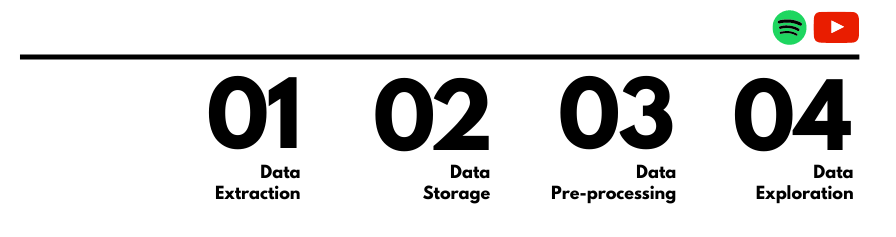

In [5]:
Image(filename="Method.png")

### 4.1 Data Extraction
<br>

<div style='text-align: justify;'>The two data sources chosen were YouTube and Spotify, each with a publicly available API system for data extraction. The first part of the process was to obtain all available data for exploratory analysis. For both sources, the chosen entity for comparison is <b>TED</b>. This included videos from the YouTube <b>TED</b> channel and podcasts from the Spotify <b>TED Talks Daily</b> channel. </div>


### 4.1.1 YouTube Data
<br>

<div style='text-align: justify;'>The first step was to request via the YouTube/Google API for the list of all videos under the TED channel for the year 2020 to present. The team used <b>https://www.googleapis.com/youtube/v3/activities\</b> (Youtube API) as the endpoint of our API requests and extracted the snippet and content detail parameters (see code below).</div>
<br>

<div style='text-align: justify;'>Initial data included the video titles, video description, upload date and video IDs. These were compiled for our first data set and were then screened for duplicates. Initial check indicated the presence of duplicates and upon verification, double entries were made by YouTube for their channel video lists. This was due to the re-entry of certain videos when they are included in a playlist. The team filtered these out and included only the original uploads to avoid duplication.</div>

``` python
#Get video list from YouTube API
token = None
publishedAt = []
titles = []
authors = []
description = []
video_id = []
titles_authors = []

while token != 'stop':
    res = requests.get(
        'https://www.googleapis.com/youtube/v3/activities',
        params={
            'key': youtube_api_key,
            'part': 'snippet, contentDetails',
            'channelId': 'UCAuUUnT6oDeKwE6v1NGQxug',
            'maxResults' : 500,
            'fields' :  'items(snippet/title),'
                        'items(snippet/description),' 
                        'items(snippet/publishedAt),'
                        'nextPageToken,'
                        'items(contentDetails),'
                        'pageInfo,'
                        'items(snippet/type)',
            'publishedAfter':"2020-01-01T00:00:00.0Z",
            'pageToken' : token
        },
        proxies=proxies
        ).json()

    for i in range(len(res['items'])):
        #check type if upload or playlist item
        if res['items'][i]['snippet']['type'] == 'upload':

            #get published date
            publishedAt.append(res['items'][i]['snippet']['publishedAt'])
            
            #get titles & authors
            if 'title' in res['items'][i]['snippet'].keys():
                try:
                    entry = res['items'][i]['snippet']['title']
                    title_author = entry.split(' | ',1)
                    titles_authors.append(entry)
                    titles.append(title_author[0])
                    authors.append(title_author[1])
                except IndexError:
                    authors.append('')
            else:
                titles.append('')
                authors.append('')
                titles_authors.append('')
    
            #get description    
            if 'description' in res['items'][i]['snippet'].keys():
                description.append(res['items'][i]['snippet']['description'])
            else:
                description.append('')
    
            #get video ID
            if 'videoId' in res['items'][i]['contentDetails']['upload'].keys():
                video_id.append(res['items'][i]['contentDetails']['upload']['videoId'])
            else:
                video_id.append('')
                
        else:
            pass
                
    #check for next page
    try:
        token = res['nextPageToken']
    except (KeyError):
        token = 'stop'

# Store in DataFrame
df_youtube1 = pd.DataFrame({'full_title_author' : titles_authors,
                            'title' : titles,
                            'author' : authors,
                            'published_at' : publishedAt,
                            'description' : description,
                            'video_id' : video_id
                           })
```

<div style='text-align: justify;'>After obtaining the final list of YouTube videos from TED, each video was then subjected to another feature extraction (see code below) using endpoint <b>https://www.googleapis.com/youtube/v3/videos</b>, which includes extraction of video engagement statistics (likes, comments, views) and video duration. The dataframes from both requests were then merged to create the main YouTube data set.</div>

``` python
#Get video details from YouTube API
youtube_details = []
stats = ['viewCount',
         'likeCount',
         'dislikeCount',
         'favoriteCount',
         'commentCount']

for video_id in df_youtube1['video_id'].tolist():
    res_details = requests.get(
        'https://www.googleapis.com/youtube/v3/videos',
        params={
            'key': youtube_api_key,
            'part': 'statistics, contentDetails',
            'id': video_id
        },
        proxies=proxies
    ).json()
    
    #get duration
    duration = res_details['items'][0]['contentDetails']['duration']

    details = {'video_id': video_id, 'duration' : duration}

    # get statistics
    for stat in stats:
        try:
            details[stat] = res_details['items'][0]['statistics'][stat]
        except KeyError:
            details[stat] = None
    youtube_details.append(details)
```

### 4.1.2 Spotify Data
<br>

<div style='text-align: justify;'>On the other hand, Spotify started to post podcast episodes only recently, June 2020, which was one of the limitations of our data set for our second source. The team extracted all features related to the podcast episodes under the said channel and the endpoint used for the API request was <b>https://api.spotify.com/v1/shows</b>.  The features includ the title, description, duration, and release date. The extracted data form this request constitutes our Spotify data set.</div>

``` python
# Get data using Spotify API
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token),
    'Accept': 'application/json',
    "Content-Type": "application/json"}

# TED Talks Channel in Spotify
get_path = ("https://api.spotify.com/v1/shows/"
            "1VXcH8QHkjRcTCEd88U3ti/episodes?market=US&limit=50")

r = requests.get(get_path,
                 headers=headers,
                 proxies=proxies).json()

spotify_ted = []
for i in range(len(r['items'])):
    spotify_ted.append([r['items'][i]['name'],
                        re.findall(r'^(.+) \|', r['items'][i]['name'])[0],
                        re.findall(r'\| (.+)$', r['items'][i]['name'])[0],
                        r['items'][i]['description'],
                        r['items'][i]['release_date'],
                        r['items'][i]['duration_ms'],
                        r['items'][i]['duration_ms']/60_000])

# Get data using Spotify API (succeeding pages)
get_path = r['next']

while get_path is not None:
    r = requests.get(get_path,
                 headers=headers,
                 proxies=proxies
                ).json()
    
    for i in range(len(r['items'])):
        time.sleep(0.1)
        spotify_ted.append([r['items'][i]['name'],
                            re.findall(r'^(.+) \|', r['items'][i]['name'])[0],
                            re.findall(r'\| (.+)$', r['items'][i]['name'])[0],
                            r['items'][i]['description'],
                            r['items'][i]['release_date'],
                            r['items'][i]['duration_ms'],
                            r['items'][i]['duration_ms']/60_000])
    try:
        get_path = r['next']
    except KeyError:
        break

# Store in DataFrame
df_spotify_ted = pd.DataFrame(spotify_ted,
                              columns=['full_title_author',
                                       'title',
                                       'author',
                                       'description',
                                       'date_released',
                                       'duration_ms',
                                       'duration_min'])
```

## 4.2 Data Storage
<br>

<div style='text-align: justify;'>The data scraped using Youtube API and Spotify API were then stored into an SQLite database `ted_talks.db`. The SQL database file contains two tables <b>youtube</b> and <b>spotify</b>. The schema of the tables within the database is shown below. Likewise, the script used to store the data into a database file is provided.</div>

In [6]:
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 4.1 Tables Present in SQLite Database (ted_talks.db)</b></center>'))

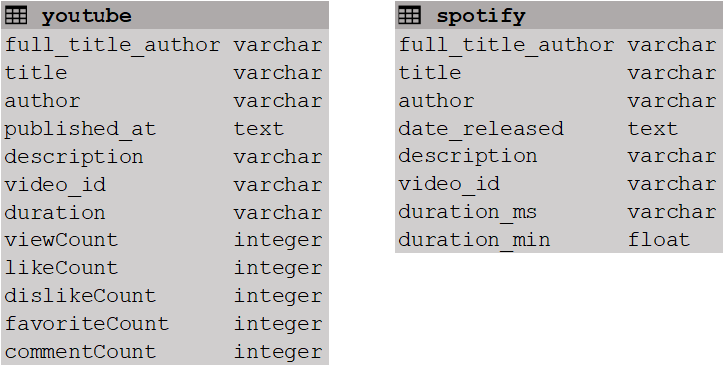

In [7]:
Image(filename="ted_talks_db.png", width=500)

``` python
# Connecting to an SQLite database
engine = create_engine('sqlite:///ted_talks.db')

# Creating SQL DB with appropriate data types
df_spotify_ted.to_sql(name='spotify', con=engine, if_exists='replace',
                      index=False,
                      dtype={'full_title_author': VARCHAR(length=255),
                             'title': VARCHAR(length=255),
                             'author': VARCHAR(length=255),
                             'description': TEXT,
                             'date_released': TEXT,
                             'duration_ms': INTEGER,
                             'duration_min': FLOAT(precision=6,
                                                   asdecimal=True)})

# Creating SQL DB with appropriate data types
df_youtube.to_sql(name='youtube', con=engine, if_exists='replace',
                  index=False,
                  dtype={'full_title_author': VARCHAR(length=255),
                         'title': VARCHAR(length=255),
                         'author': VARCHAR(length=255),
                         'description': VARCHAR(length=255),
                         'published_at': TEXT,
                         'video_id': VARCHAR(length=255),
                         'duration': VARCHAR(length=255),
                         'viewCount': INTEGER,
                         'likeCount': INTEGER,
                         'dislikeCount': INTEGER,
                         'favoriteCount': INTEGER,
                         'commentCount': INTEGER})
```

<div style='text-align: justify;'>The files above can also be found in the supplemental files 'Supplement 01 - Scraping for YouTube-TED.ipynb' and 'Supplement 02 -  Scraping for Spotify-TED.ipynb'.</div>

## 4.3 Data Pre-processing
<br>

<div style='text-align: justify;'> After establishing the database, additional processing was done before proceeding with the data analysis. First, the YouTube duration feature was transformed to minutes so that it will have the same unit as the Spotify duration feature. The upload dates were also filtered to fit our target one year timeframe from July 2020 to June 2021.</div>
<br>

<div style='text-align: justify;'>The next step was to prepare the two data frames to create three subgroups. The first group <b>df_overlap</b> consists of common titles from both the YouTube and Spotify data sets. We used the title to identify matches between them and merged the corresponding data for each video. The two other subgroups consist of those who are not included in the first group: those found only in YouTube <b>df_youtube_only</b>, and those only in Spotify <b>df_spotify_only</b>.</div>

In [8]:
conn = sqlite3.connect('ted_talks.db')

#filter df_spotify and df_youtube, July 1, 2020 to June 30, 2021

df_spotify = pd.read_sql('select * from spotify', conn)
df_spotify['date_released'] = pd.to_datetime(df_spotify['date_released'])
df_spotify = df_spotify.rename(columns={'date_released' : 'upload_date'})
df_spotify = df_spotify.loc[(df_spotify['upload_date'] >= '2020-07-01') 
                            & (df_spotify['upload_date'] <= '2021-06-30')]


df_youtube = pd.read_sql('select * from youtube', conn)
df_youtube['published_at'] = pd.to_datetime(df_youtube['published_at'])\
                                .dt.strftime('%Y-%m-%d')
df_youtube['published_at'] = pd.to_datetime(df_youtube['published_at'])
df_youtube = df_youtube.rename(columns={'published_at' : 'upload_date'})
df_youtube = df_youtube.loc[(df_youtube['upload_date'] >= '2020-07-01') 
                            & (df_youtube['upload_date'] <= '2021-06-30')]

#convert the duration column in df_youtube, convert PT format to minutes

duration_min = []
for item in df_youtube['duration']:
    try: 
        s = int(''.join(re.findall(r'(\d{1,2}(?=S))', item)))/60
    except ValueError:
        s = 0
    try: 
        m = int(''.join(re.findall(r'(\d{1,2}(?=M))', item)))
    except ValueError:
        m = 0
    try: 
        h = int(''.join(re.findall(r'(\d{1,2}(?=H))', item)))*60
    except ValueError:
        h = 0
    
    new_duration = s+m+h
    duration_min.append(new_duration)

df_youtube['duration_min'] = duration_min

In [9]:
#lower case and strip titles for both dataframes, pre-matching

df_spotify['title'] = df_spotify['title'].str.lower()
df_spotify['title'] = df_spotify['title'].str.strip()

df_youtube['title'] = df_youtube['title'].str.lower()
df_youtube['title'] = df_youtube['title'].str.strip()

#create list of titles

sp_titles = list(df_spotify['title'])
yt_titles = list(df_youtube['title'])

common_list = []

for item in sp_titles:
    if item in yt_titles:
        common_list.append(item)
    else:
        pass

#matches in df_spotify & df_youtube for overlap
match_spotify = df_spotify[df_spotify['title'].isin(common_list)]
match_youtube = df_youtube[df_youtube['title'].isin(common_list)]

#create df for overlap
df_overlap = pd.merge(left=match_youtube, right=match_spotify,
                      left_on='title', right_on='title',
                      suffixes=['_YT','_SP'])

#spotify only dataframe
df_spotify_only = df_spotify[~df_spotify['title'].isin(common_list)]

#youtube only dataframe
df_youtube_only = df_youtube[~df_youtube['title'].isin(common_list)]

#### Sample dataframes of the 3 subgroups can be seen below:

In [10]:
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Table 4.1 Dataframe of Titles Found in Both YouTube and Spotify</b></center>'))

display(df_overlap.head())

full_title_author_YT  \
0  The infinite alchemy of storytelling | Zahra A...   
1    The rigged test of leadership | Sophie Williams   
2  How to heat your home without hurting the plan...   
3  The life-saving tech helping mothers make heal...   
4  The search for microscopic aliens | Sarah Rugh...   

                                               title        author_YT  \
0               the infinite alchemy of storytelling   Zahra Al-Mahdi   
1                      the rigged test of leadership  Sophie Williams   
2   how to heat your home without hurting the planet     Kathy Hannun   
3  the life-saving tech helping mothers make heal...     Aparna Hegde   
4                  the search for microscopic aliens  Sarah Rugheimer   

  upload_date_YT                                     description_YT  \
0     2021-06-30  Visit http://TED.com/shapeyourfuture to watch ...   
1     2021-06-29  Visit http://TED.com to get our entire library...   
2     2021-06-28  Visit http://TED.com/shapeyourfuture to watch ...   
3     2021-06-23  Visit http://TED.com/shapeyourfuture to watch ...   
4     2021-06-22  Visit http://TED.com/shapeyourfuture to watch ...   

      video_id  duration  viewCount  likeCount  dislikeCount  favoriteCount  \
0  CDnwc3NAx-c   PT4M37S      38475       1545            54              0   
1  5kY_hDxnYx0  PT13M29S      33118        850           253              0   
2  OAXPl_jRvps   PT5M21S      46448       1848            96              0   
3  iGlyjfFquxw    PT8M3S      21118        574            49              0   
4  w1CqXHlAzkc   PT5M43S      34304       1317            28              0   

   commentCount  duration_min_YT  \
0          82.0         4.616667   
1           NaN        13.483333   
2         223.0         5.350000   
3         136.0         8.050000   
4         126.0         5.716667   

                                full_title_author_SP        author_SP  \
0  The infinite alchemy of storytelling | Zahra A...   Zahra Al-Mahdi   
1    The rigged test of leadership | Sophie Williams  Sophie Williams   
2  How to heat your home without hurting the plan...     Kathy Hannun   
3  The life-saving tech helping mothers make heal...     Aparna Hegde   
4  The search for microscopic aliens | Sarah Rugh...  Sarah Rugheimer   

                                      description_SP upload_date_SP  \
0  TED Fellow Zahra Al-Mahdi was raised by screen...     2021-06-30   
1  The glass cliff: an experience of taking on a ...     2021-05-28   
2  Of all the mundane yet astonishing marvels of ...     2021-06-28   
3  Overcrowded clinics, extensive wait times and ...     2021-06-23   
4  Astrophysicist and TED Fellow Sarah Rugheimer ...     2021-06-22   

   duration_ms  duration_min_SP  
0       337568         5.626133  
1       892226        14.870433  
2       354391         5.906517  
3       552242         9.204033  
4       424660         7.077667

In [11]:
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Table 4.2 Dataframe of Titles Found Only in YouTube</b></center>'))

display(df_youtube_only.head())

full_title_author  \
33  A history of Indigenous languages -- and how t...   
34  5 skin health myths to stop believing now | Bo...   
37  Why schools need to embrace kids' creativity |...   
38  Can you actually boost your immune system? Her...   
45  Why healthy bones are about so much more than ...   

                                                title  \
33  a history of indigenous languages -- and how t...   
34          5 skin health myths to stop believing now   
37       why schools need to embrace kids' creativity   
38  can you actually boost your immune system? her...   
45  why healthy bones are about so much more than ...   

                            author upload_date  \
33                  Lindsay Morcom  2021-06-25   
34  Body Stuff with Dr. Jen Gunter  2021-06-24   
37                Sir Ken Robinson  2021-06-21   
38  Body Stuff with Dr. Jen Gunter  2021-06-17   
45  Body Stuff with Dr. Jen Gunter  2021-06-10   

                                          description     video_id  duration  \
33  Visit http://TED.com to get our entire library...  BoRXbjGJrI0  PT13M34S   
34  Your skin is your body's largest organ ... but...  OeGpf1MyM2M   PT5M50S   
37  Watch the full talk: http://tedtalks.social/cr...  g4IAa8wZlqU   PT2M15S   
38  Take vitamin C supplements when you feel a col...  7H0qAqXR-fw    PT5M7S   
45  Drinking calcium-rich milk strengthens your bo...  1Zh045t0xcE   PT3M36S   

    viewCount  likeCount  dislikeCount  favoriteCount  commentCount  \
33      41054       1108            49              0         141.0   
34     397174      17174           639              0         706.0   
37      53919       2752            12              0         198.0   
38     218643       9648           459              0         626.0   
45     145531       6946            80              0         258.0   

    duration_min  
33     13.566667  
34      5.833333  
37      2.250000  
38      5.116667  
45      3.600000

In [12]:
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Table 4.3 Dataframe of Titles Found Only'
             'in Spotify</b></center>'))

display(df_spotify_only.head())

full_title_author  \
29  Why we're more honest with machines than peopl...   
31  What to do when climate change feels unstoppab...   
32  How deepfakes undermine truth and threaten dem...   
35  The emotions behind your money habits | Robert...   
36  How marijuana reform could repair, reclaim and...   

                                                title            author  \
29    why we're more honest with machines than people      Anne Scherer   
31   what to do when climate change feels unstoppable      Clover Hogan   
32  how deepfakes undermine truth and threaten dem...   Danielle Citron   
35              the emotions behind your money habits   Robert A. Belle   
36  how marijuana reform could repair, reclaim and...  Khadijah Tribble   

                                          description upload_date  \
29  For a genuine conversation, consider talking t...  2021-06-29   
31  Today's youth have inherited a big, unpreceden...  2021-06-25   
32  The use of deepfake technology to manipulate v...  2021-06-24   
35  Your money habits reveal a lot about you: your...  2021-06-21   
36  The war on drugs in the United States undid mu...  2021-06-18   

    duration_ms  duration_min  
29       749728     12.495467  
31       817437     13.623950  
32       850743     14.179050  
35       578783      9.646383  
36       645499     10.758317

## 4.4 Exploratory Data Analysis

### 4.4.1 Count
<br>
<div style="text-align: justify">For data on monthly upload count,  <b>'df_youtube'</b> and <b>'df_spotify'</b> were merged into a new pandas DataFrame using <b>outer join</b>. Separate Pandas Series were made for Youtube and Spotify upload count using 'groupby' function with 'pd.Grouper' to group rows by month and year uploaded. The merged dataframe from these series was then plotted to see the monthly upload count of the platforms side-by-side.</div>

### 4.4.2 Delay
<br>
<div style="text-align: justify">For the delay analysis, the `df_overlap` dataframe was used. The `first_uploaded` column was added to identify where the content was first uploaded. Then, column was counted per class and plotted for comparison. The `delay(YT-SP)` column was then computed to know the exact days a content was delayed for release to other platform.  The delay duration was also plotted.</div>

### 4.4.3 Duration
<br>
<div style="text-align: justify">For the duration analysis, it was analyzed for contents found in both platforms. The duration difference was computed by subtracting the Spotify podcasts length by the YouTube video length.  <br>

The distribution of the video lengths was then checked by binning. The video duration was compared to the corresponding video engagement statistics (likes, views and comments) after. First step was to compute the number of days it is now present in YouTube to get a daily average for the engagement metrics. This created a new column labeled `days_onYT` and the average metrics per video length was then analyzed. This was done for the `df_overlap` dataframe and the `df_youtube_only` since there are no engagement metrics available for Spotify. </div>
<br>

### 4.4.4 Engagement Statistics
<br>
<div style="text-align: justify">For engagement statistics, as mentioned, we do not have available data on Spotify streams. Hence, instead of comparison between the two platforms, we focused on Youtube's engagement statistics, and how it differed between content uploaded in Youtube only and content uploaded in both Youtube and Spotify. </div>
<br>
<div style="text-align: justify">We wanted to see if the video's engagement or popularity in YouTube was affected if the content was found in both platforms or not. The main YouTube and Spotify data frames were merged via left join on the `title` column. A new column `Uploaded in Spotify?` was also created to determine if the video was also uploaded in Spotify or not, this was used for classification in the analysis.</div>
<br>
<div style="text-align: justify">The corresponding columns of engagement stats were then converted to numerical data type for  easier analysis between those found in both platforms, and those found only on YouTube. The resulting data frame was then plotted.</div>
<br>
<div style="text-align: justify">Machine learning techniques were also tested to check for a model that predicts whether a YouTube video is uploaded in Spotify based on its engagement statistics. However, accuracies are similar with results of Proportional Chance Criterion, meaning the model does not predict better than chance. (not shown in this report)</div>
<br>

### 4.4.5 Top Speakers
<br>
<div style="text-align: justify">For the Top Speakers analysis, the number of episodes per parsed `author` or speaker was counted and classified whether he had only one or more than one talk uploaded or not. The tables `df_youtube` and `df_spotify` was used for this. The `list` of authors or speakers with multiple videos are stored into `mult_speakers_yt` and `mult_speakers_sp`.</div>

### 4.4.6 Top Words
<br>
<div style="text-align: justify">Lastly for the top words analysis, the title was split to get the individual words and then distributed them per column using `explode`.  This column of single words can now be used for the analysis. Relevant words were then identified using a list of words from the `stopwords` module as filter, essentially dropping the rows found in the `stopwords` list.
A new data frame was then created containing columns for the `month_year` with a series of unique words as index. The count of words per month_year was also computed and new `total count` column was created to identify the overall top words. 
For visualization, a bar plot was created for the overall top words and a bubble plot for monthly trend of words. </div>

# 5. Results
<br>

<div style="text-align: justify"> The previous section discussed the techniques and strategies that are vital in explaining the results. In this chapter, the explanation of the data will be displayed. For the overview of the data, number of released content in Spotify and YouTube will be presented. Subsequently, the insights and key takeaways in the topics: (1) delay in uploads, (2) content duration, (3) engagement statistics (views, comments, likes, etc.), (4) top speakers, and (5)  top words used in titles will be presented. Generally, the group aims to know if these topics have significant effect on the content and to know if there are difference or similarity in content for both sites. </div>

## 5.1 Count
<br>

<div style="text-align: justify"> TED's monthly uploads  on YouTube and Spotify vary in numbers. From July 2020 to June 2021, there was a minimum of ten uploads per month for Spotify, with a peak of twenty both on October 2020 and January 2021. On the other hand, Youtube uploads were higher averaging around fifteen uploads per month with peaks of twenty-three on October 2020 and twenty-one on April 2021. </div>

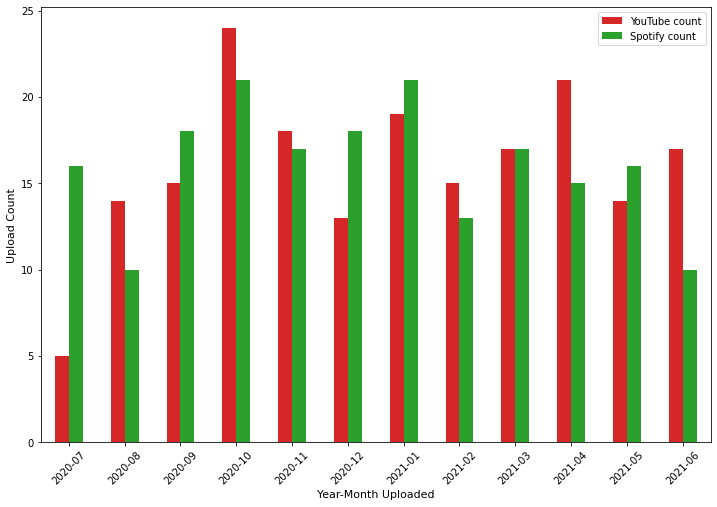

In [13]:
# Create main df for all
df_all = pd.merge(left=df_youtube, right=df_spotify,
                      left_on='title', right_on='title',
                      suffixes=['_YT','_SP'])

# Create groupby series for YouTube and Spotify count
yt_count = (df_all.groupby(pd.Grouper(key="upload_date_YT", freq="M"))
            ['title'].count().rename('YouTube count'))
sp_count = (df_all.groupby(pd.Grouper(key="upload_date_SP", freq="M"))
            ['title'].count().rename('Spotify count'))
yt_sp_count = pd. concat([yt_count, sp_count], axis=1)

# Plot resulting df
fig, ax = plt.subplots()                         
yt_sp_count.plot(y=['YouTube count', 'Spotify count'], kind="bar",
                 color=['#d62728', '#2ca02c'], ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m") for i in yt_sp_count.index],
                   rotation=45)
ax.set_xlabel("Year-Month Uploaded", size=11)
ax.set_ylabel('Upload Count', size=11)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.1 Monthly Upload Count for'
             ' YouTube and Spotify</b></center>'))

plt.show()

## 5.2 Delay in Upload


### 5.2.1 Where was the Content First Uploaded?
<br>

<div style="text-align: justify"> TED's YouTube and Spotify channels have 192 contents that are the same. However, the question is where it was first uploaded. The answer to this will help us find which site is prioritized by TED in delivering fresher content.  </div>


In [14]:
# Create main df for delay in upload.
df_overlap_delay = df_overlap.copy()
df_overlap_delay = df_overlap_delay[['title', 'author_SP', 'upload_date_SP',
                                     'author_YT', 'upload_date_YT']]
df_overlap_delay['delay(YT-SP)'] = (df_overlap_delay['upload_date_YT']
                                    - df_overlap_delay['upload_date_SP'])

conditions = [(df_overlap_delay['delay(YT-SP)'].astype(int) < 0),
              (df_overlap_delay['delay(YT-SP)'].astype(int) > 0),
              (df_overlap_delay['delay(YT-SP)'].astype(int) == 0)]
values = ['YouTube', 'Spotify', 'Same Day']
df_overlap_delay['first_uploaded'] = np.select(conditions, values)

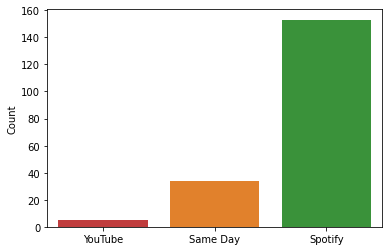

In [15]:
# Count number of where the content is first uploaded.
df_delay_count = (df_overlap_delay.groupby('first_uploaded')
                  ['delay(YT-SP)'].count().reset_index())
df_delay_count['count'] = df_delay_count['delay(YT-SP)']
df_delay_count = (df_delay_count.drop(columns='delay(YT-SP)')
                  .sort_values('count'))

# Set palette.
palette_tab10 = np.array(sns.color_palette("tab10"))
palette_delay = np.array([palette_tab10[3],
                          palette_tab10[1],
                          palette_tab10[2]])

# Plot the number of where the content is first uploaded.
sns.barplot(data=df_delay_count,
            x='first_uploaded',
            y='count',
            palette=palette_delay)
plt.ylabel('Count')
plt.xlabel('')
plt.gcf().set_size_inches(6, 4)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.2 Count of Where it'
             ' was First Uploaded</b></center>'))

plt.show()

<div style="text-align: justify"> 153 episodes were first uploaded in Spotify while there were 5 in YouTube. This could mean that they prioritize fresher content in Spotify more than Youtube. It is quite interesting that nore that there are 34 pieces of content that were released on the same day. This reveals that TED also has the capability of same day release of content for both YouTube and Spotify.  </div>

### 5.2.2 Delay Duration
<br>

<div style="text-align: justify"> Now that we see the count of where content is first uploaded, let's dive into the delay duration. Here, it will be shown whether there will be a difference in delay duration in uploading content. For context, delay duration is the time it takes for a content to be uploaded on the second site. For example, the time it takes to upload content in YouTube after uploading the same content in Spotify. </div>

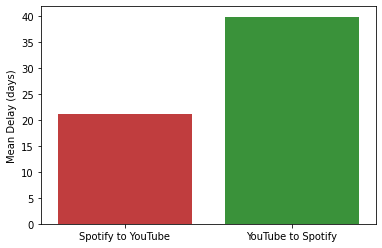

In [16]:
# create dataframe for mean delay duration and where it was delayed.
div = 86_400000000000
df_overlap_delay['delay_float'] = (df_overlap_delay['delay(YT-SP)']
                                   .values.astype(np.int64)/div)
df_delay_means = df_overlap_delay.groupby('first_uploaded')['delay_float']
df_delay_means = df_delay_means.mean().abs().reset_index()
df_delay_means['mean_delay'] = df_delay_means['delay_float']
df_delay_means = df_delay_means.drop(columns='delay_float').iloc[1:]
df_delay_means = df_delay_means.sort_values('mean_delay')
conditions = [
    (df_delay_means['first_uploaded'] == 'YouTube'),
    (df_delay_means['first_uploaded'] == 'Spotify')]
values = ['YouTube to Spotify', 'Spotify to YouTube']
df_delay_means['delayed_in'] = np.select(conditions, values)

# Set palette.
palette_delay_means = np.array([palette_tab10[3], palette_tab10[2]])

# Plot delay duration.
sns.barplot(data=df_delay_means, x='delayed_in',
            y='mean_delay', palette=palette_delay_means)
plt.ylabel('Mean Delay (days)')
plt.xlabel('')
plt.gcf().set_size_inches(6, 4)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.3 Delay of Upload in Other Site</b></center>'))

plt.show()

<div style="text-align: justify"> It can be seen that the delay in second upload to YouTube (~20 days after released in Spotify) is almost half when the second upload is to Spotify (~40 days). It may be because it is easier to edit videos than the sounds (requires extraction from videos and audio signal processing). This makes sense as to why TED most likely choose to upload it first to Spotify so that the delay is much lower than doing it the other way around.</div>

<br>

<div style="text-align: justify"> TED may also identify which topics or type of speakers in YouTube have high engagements like comment, views, and etc. This is to increase the number of content, to have faster release (because it will be first released on Spotify), and to have higher efficiency in releasing content (less delays). </div>

## 5.3 Duration

### 5.3.1 Spotify vs Youtube
<br>
<div style="text-align: justify">A quick look at the duration of videos/podcasts found in both Spotify and YouTube show that most of the ones uploaded to Spotify are usually longer. Upon checking this is true because the podcasts version usually has embedded advertisements which make the duration longer.</div>

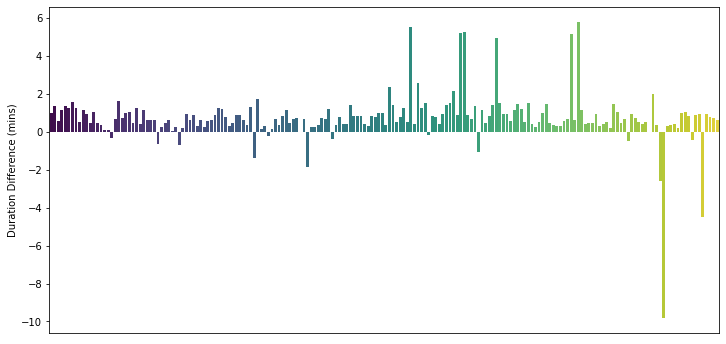

In [17]:
df_durations_OL = df_overlap.copy()

diff_dur = []

for i in range(len(df_durations_OL)):
    diff =  (df_durations_OL['duration_min_SP'][i] -
             df_durations_OL['duration_min_YT'][i])
    diff_dur.append(diff)

for i in diff_dur:
    if i > -10:
        pass
    else:
        diff_dur.remove(i)

sns.barplot(x=np.arange(len(diff_dur)), y=diff_dur, palette='viridis')
plt.ylabel('Duration Difference (mins)')
plt.xticks([])
plt.gcf().set_size_inches(12,6)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.4 Duration Difference of Spotify Episode to '
             'Corrresponding YouTube Video</b></center>'))

plt.show()

### 5.3.2 Duration vs Engagement
 <br>
<div style="text-align: justify">For YouTube videos that are also posted as Spotify podcasts, the usual video duration falls between 1 to 20 minutes. Looking closer, the trend for the engagement metrics (likes, views, comments) is increasing as the number of minutes increases. This means that people are still engaged and interested even if the video is a little longer.</div>

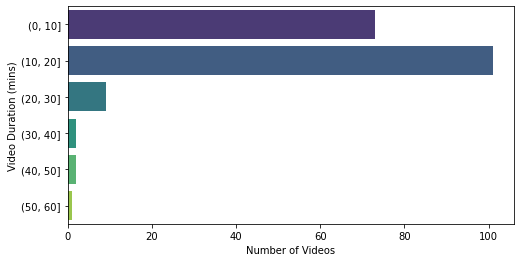

In [18]:
#create dataframe
df_durations_OL = df_overlap.copy()
df_durations_OL = df_overlap[['title', 'viewCount', 'likeCount', 
                              'dislikeCount', 'commentCount', 
                              'duration_min_YT', 'duration_min_SP', 
                              'upload_date_YT', 'upload_date_SP']]
df_durations_OL = df_durations_OL.dropna()
df_durations_OL.reset_index(inplace=True)

#create columns for number of days uploaded to date
import datetime

date = "2021-08-08"
final = datetime.datetime.strptime(date, '%Y-%m-%d')

days_list = []

for i in range(len(df_durations_OL)):
    days_YT = (final - df_durations_OL['upload_date_YT'][i]).days
    days_list.append(days_YT)

df_durations_OL.insert(5, "days_onYT", days_list)

average_comments = []
average_likes = []
average_views = []

#create columns for engagement averages
for i in range(len(df_durations_OL)):

    ave_comment = (int(df_durations_OL['commentCount'][i]) / 
                   df_durations_OL['days_onYT'][i])
    
    ave_like = (int(df_durations_OL['likeCount'][i]) / 
                df_durations_OL['days_onYT'][i])
    
    ave_view = (int(df_durations_OL['viewCount'][i]) / 
                df_durations_OL['days_onYT'][i])

    average_comments.append(ave_comment)
    average_likes.append(ave_like)
    average_views.append(ave_view)
    
df_durations_OL.insert(5, "daily_comments", average_comments)
df_durations_OL.insert(5, "daily_likes", average_likes)
df_durations_OL.insert(5, "daily_views", average_views)

#plot
df_dur = df_durations_OL.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 70, 10)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min_YT"],
                                page_range))['daily_views'].count())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_views',
            y='duration_min_YT',
            data=df_dur, palette='viridis')
plt.gcf().set_size_inches(8,4)
plt.ylabel('Video Duration (mins)')
plt.xlabel('Number of Videos')

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.5 Number of Videos (Both in YouTube & Spotify) '
             'per Duration Time Bin</b></center>'))

plt.show()

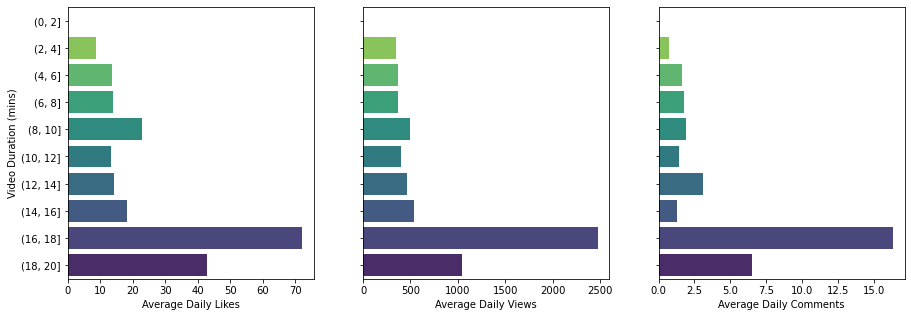

In [19]:
df_max20_overlap = df_durations_OL.copy()
df_max20_overlap = df_max20_overlap[(df_durations_OL
                                     ['duration_min_YT'] <= 20)]

#plot average engagement vs duration
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

df_dur = df_max20_overlap.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min_YT"],
                                page_range))['daily_likes'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_likes',
            y='duration_min_YT',
            data=df_dur, palette='viridis_r',
            ax=ax1)

df_dur = df_max20_overlap.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min_YT"],
                                page_range))['daily_views'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_views',
            y='duration_min_YT',
            data=df_dur, palette='viridis_r',
            ax=ax2)

df_dur = df_max20_overlap.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min_YT"],
                                page_range))['daily_comments'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_comments',
            y='duration_min_YT',
            data=df_dur, palette='viridis_r',
            ax=ax3)

ax1.set(xlabel='Average Daily Likes', ylabel='Video Duration (mins)')
ax2.set(xlabel='Average Daily Views', ylabel='')
ax3.set(xlabel='Average Daily Comments', ylabel='')

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.6 Average Engagement Values: Likes, Views & '
             'Comments (Both in YouTube & Spotify)</b></center>'))

plt.show()

Meanwhile for those uploaded only as YouTube videos, majority of the video also fall at the 1–20-minute duration range. But in contrast to those uploaded in both platforms, YouTube-only content actually get higher engagement for video in the 2-to-6-minute duration range. This suggests the preference of viewers for shorter content.

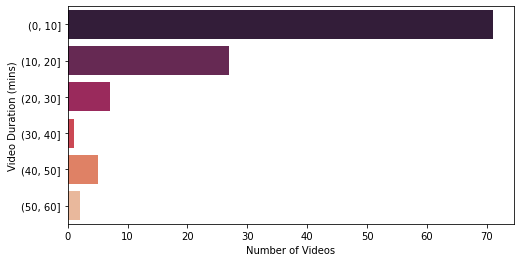

In [20]:
#create dataframe
df_durations_YT = df_youtube_only
df_durations_YT = df_youtube_only.drop(['full_title_author', 
                                        'description', 'duration', 
                                        'favoriteCount', 'author', 
                                        'video_id'], axis=1)
df_durations_YT = df_durations_YT.dropna()
df_durations_YT.reset_index(inplace=True)

#create columns for number of days uploaded to date
import datetime 

date = "2021-08-08"
final = datetime.datetime.strptime(date, '%Y-%m-%d')

days_list = []

for i in range(len(df_durations_YT)):
    days_YT = (final - df_durations_YT['upload_date'][i]).days
    days_list.append(days_YT)

df_durations_YT.insert(5, "days_onYT", days_list)

#create columns for engagement averages
average_comments = []
average_likes = []
average_views = []

for i in range(len(df_durations_YT)):

    ave_comment = (int(df_durations_YT['commentCount'][i]) / 
                   df_durations_YT['days_onYT'][i])
    
    ave_like = (int(df_durations_YT['likeCount'][i]) /
                df_durations_YT['days_onYT'][i])
    
    ave_view = (int(df_durations_YT['viewCount'][i]) / 
                df_durations_YT['days_onYT'][i])

    average_comments.append(ave_comment)
    average_likes.append(ave_like)
    average_views.append(ave_view)

df_durations_YT.insert(5, "daily_comments", average_comments)
df_durations_YT.insert(5, "daily_likes", average_likes)
df_durations_YT.insert(5, "daily_views", average_views)

# plot
df_dur = df_durations_YT.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 70, 10)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min"],
                                page_range))['daily_views'].count())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_views',
            y='duration_min',
            data=df_dur, palette='rocket')

plt.gcf().set_size_inches(8,4)
plt.ylabel('Video Duration (mins)')
plt.xlabel('Number of Videos')
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.7 Number of Videos (Only in YouTube) per Duration '
             'Time Bin</b></center>'))
plt.show()

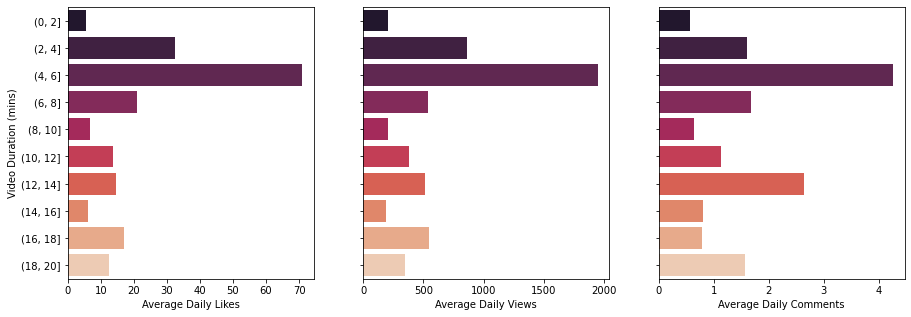

In [21]:
df_max20_youtube = df_durations_YT.copy()
df_max20_youtube = df_max20_youtube[(df_durations_YT['duration_min'] <= 20)]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

df_dur = df_max20_youtube.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min"],
                                page_range))['daily_likes'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_likes',
            y='duration_min',
            data=df_dur, palette='rocket',
            ax=ax1)

df_dur = df_max20_youtube.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min"],
                                page_range))['daily_views'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_views',
            y='duration_min',
            data=df_dur, palette='rocket',
            ax=ax2)

df_dur = df_max20_youtube.copy()
df_dur['dur_range'] = 0
page_range = np.arange(0, 22, 2)
df_dur = (df_dur.groupby(pd.cut(df_dur["duration_min"],
                                page_range))['daily_comments'].mean())
df_dur = df_dur.reset_index()

sns.barplot(x='daily_comments',
            y='duration_min',
            data=df_dur, palette='rocket',
            ax=ax3)

ax1.set(xlabel='Average Daily Likes', ylabel='Video Duration (mins)')
ax2.set(xlabel='Average Daily Views', ylabel='')
ax3.set(xlabel='Average Daily Comments', ylabel='')

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.8 Average Engagement Values: Likes, Views & '
             'Comments (Only in YouTube)</b></center>'))

plt.show()

## 5.4 Engagement Statistics


### 5.4.1 Difference in Engagement Statistics

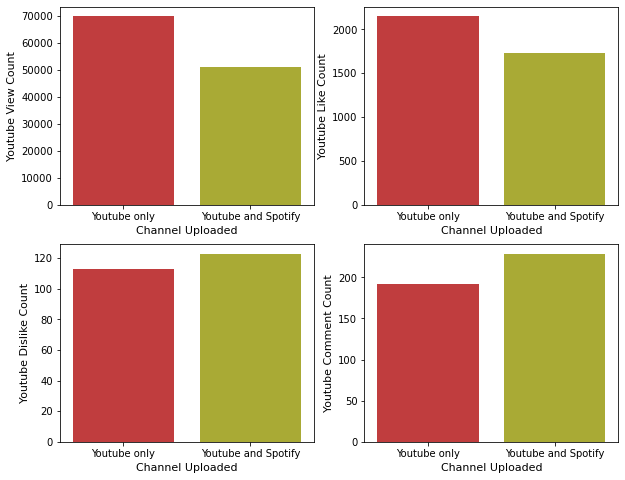

In [22]:
df_merge_stats = pd.merge(left=df_youtube, right=df_spotify,
                          on='title', how='left')
df_merge_stats['Uploaded in Spotify?'] = (~df_merge_stats
                                          ['full_title_author_y'].isna())
# get needed columns
df_merge_stats = df_merge_stats.loc[:,['video_id',
                                       'viewCount',
                                       'likeCount',
                                       'dislikeCount',
                                       'commentCount',
                                       'Uploaded in Spotify?']]

# convert stats to numeric
# cols = df_merge_stats.columns.drop('video_id')
# df_merge_stats[cols] = (df_merge_stats[cols].apply
#                         (pd.to_numeric, errors='coerce'))

# plot
fig, ax = plt.subplots(2, 2, figsize=(10,8))
ax = ax.flatten()
stats = ["viewCount",
         "likeCount",
         "dislikeCount",
         "commentCount"]
stat_label = ["Youtube View Count",
              "Youtube Like Count",
              "Youtube Dislike Count",
              "Youtube Comment Count"]

for i in range(len(ax)):
    sns.barplot(x="Uploaded in Spotify?",
                y=stats[i],
                data=df_merge_stats,
                palette=['#d62728', '#bcbd22'],
                estimator=np.median,ci=None, ax=ax[i])
    ax[i].set_xlabel("Channel Uploaded", size=11)
    ax[i].set_ylabel(stat_label[i], size=11)
    ax[i].set_xticklabels(['Youtube only', 'Youtube and Spotify'])
    
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.9 Comparison of YouTube'
             ' engagement statistics between TED Talk content in YouTube only'
             ' and in both YouTube and Spotify</b></center>'))

#### 5.4.1.1 YouTube View Count

<br>

<div style="text-align: justify">Videos that are solely uploaded in YouTube have a higher view count, around 20,000 more views, than those videos that are also present in TED's Spotify channel. This is probably because of a video's audience is spread when it is present in both platforms. Much importantly, it tells us that TED does not really use YouTube's engagement statistics as a decision factor in a content's upload to Spotify.</div>


#### 5.4.1.2 YouTube Like Count

<br>

<div style="text-align: justify">The same trend can be observed for the video's YouTube like count. Videos that are solely uploaded in YouTube have a slightly higher like count, around 500 more likes, than those videos that are also present in TED's Spotify channel. Similar reasoning with the view count trend is applicable, likes are lower for videos in YouTube only because the audience is spread between the two platforms.</div>



#### 5.4.1.3 YouTube Dislike Count

<br>

<div style="text-align: justify">For dislike count, there is negligible difference, around 10 dislikes, between content that is only present in YouTube, and those that are present in both platforms. This finding validates the inference that YouTube's engagement statistics does not factor into the decision of a content's upload to Spotify.</div>


#### 5.4.1.4 YouTube Comment Count

<br>

<div style="text-align: justify">Lastly, for the video's comment count, it appears that there is also negligible difference between that two categories. Around fifty more comments are observed in average for TED videos that are present in both platforms. A possible reason for this small change is that there is no avenue in Spotify to post comments, which may lead TED's Spotify audience to go into YouTube just to share their commentaries on the podcasts they listened to. </div>


<br>

### 5.4.2 Correlation Matrix

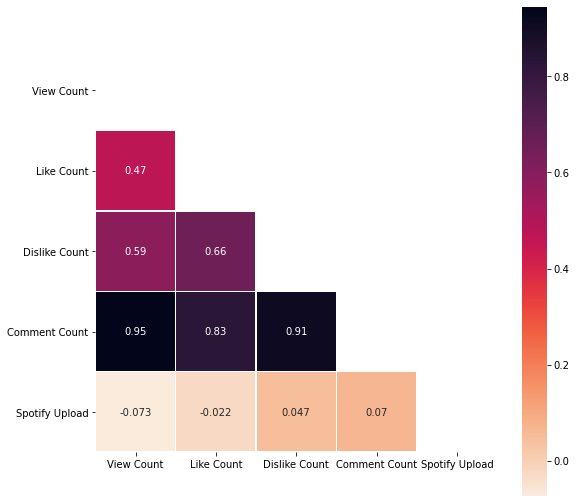

In [23]:
# Compute the correlation matrix
corr = df_merge_stats.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_labels = ['View Count',
               'Like Count',
               'Dislike Count',
               'Comment Count',
               'Spotify Upload']

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, annot=True,
            xticklabels=corr_labels,yticklabels=corr_labels)



display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.10 Correlation matrix of YouTube engagement'
             ' statistics including factor of whether content is'
             ' in YouTube only or both platforms</b></center>'))

plt.show()

<br>

<div style="text-align: justify">Upon further inspection of the correlation matrix shown in Figure 5.10, it can be observed that there is indeed low correlation between a TED Talk's YouTube's engagement statistics and its presence in Spotify as a podcast. This validates that TED does not incorporate a video's success in YouTube in its decision to upload the the audio version of it on Spotify, as suggested in the previous figure's analysis.</div>

<br>

<div style="text-align: justify">On the other hand, there are high correlations between a video's comment count and its other engagements (views, likes and dislikes). This implies that if a video resulted in more of these interactions with the audience, comments would also be higher in count. These comments can be positive or negative and so the comment count does not directly provide an insight on a video's quality. However, there is a higher correlation between comments and dislikes than comments and likes, implying that when a video is commented on more frequently, there is also a higher chance it has slightly more dislikes than likes.</div>

<br>

<div style="text-align: justify">Finally, there is low correlation between the other interactions, suggesting that higher views that not necessarily give a glimpse on whether a TED talk video is well-'liked' or 'disliked' in YouTube.</div>


## 5.5 Top Speakers

<br>

<div style="text-align: justify">TED rarely invites the same speaker to speak again. Out of the 306 videos for YouTube, there are 271 (*272) distinct speakers and only 9 have multiple topics. Similarly, out of the 274 episodes for Spotify, there are 264 unique speakers but only 8 had multiple topics. </div>

In [24]:
speakers_cnt_sp = df_spotify['author'].value_counts().sort_values(ascending=False)
speakers_cnt_yt = df_youtube['author'].value_counts().sort_values(ascending=False)
speakers_cnt_sp_only = df_spotify_only['author'].value_counts().sort_values(ascending=False)
speakers_cnt_yt_only = df_youtube_only['author'].value_counts()
mult_speakers_sp = speakers_cnt_sp[(speakers_cnt_sp > 1) & 
                                   (speakers_cnt_sp.index != '')]
mult_speakers_yt = speakers_cnt_yt[(speakers_cnt_yt > 1) & 
                                   (speakers_cnt_yt.index != '')]
mult_speakers_sp_only = speakers_cnt_sp_only[speakers_cnt_sp_only>1]
mult_speakers_yt_only = speakers_cnt_yt_only[speakers_cnt_yt_only>1]

In [25]:
# Youtube stats

df_yt_speaker_tag = df_youtube.copy()
speakers_cnt_yt = df_youtube['author'].value_counts()
mult_speakers_yt = speakers_cnt_yt[(speakers_cnt_yt > 1) & 
                                   (speakers_cnt_yt.index != '')]
mult_tag_yt = df_youtube['author'].isin(list(mult_speakers_yt.index))
df_yt_speaker_tag.loc[mult_tag_yt, 'speaker_tag'] = 'Multiple'  
df_yt_speaker_tag.loc[~mult_tag_yt, 'speaker_tag'] = 'Single'  
df_yt_speaker_summ = df_yt_speaker_tag.groupby('speaker_tag')
yt_measures = ['viewCount', 'likeCount', 'dislikeCount', 'favoriteCount', 
               'commentCount', 'duration_min']
df_yt_speaker_summ = df_yt_speaker_summ[yt_measures].mean()
df_yt_speaker_summ['channel'] = 'YouTube'

# Spotify stats

df_sp_speaker_tag = df_spotify.copy()
speakers_cnt_sp = df_spotify['author'].value_counts().sort_values(ascending=False)
mult_speakers_sp = speakers_cnt_sp[(speakers_cnt_sp > 1) & 
                                   (speakers_cnt_sp.index != '')]
mult_tag_sp = df_spotify['author'].isin(list(mult_speakers_sp.index))
df_sp_speaker_tag.loc[mult_tag_sp, 'speaker_tag'] = 'Multiple'  
df_sp_speaker_tag.loc[~mult_tag_sp, 'speaker_tag'] = 'Single'  
df_sp_speaker_summ = df_sp_speaker_tag.groupby('speaker_tag')
sp_measures = ['duration_ms', 'duration_min']
df_sp_speaker_summ = df_sp_speaker_summ[sp_measures].mean()
df_sp_speaker_summ['channel'] = 'Spotify'

# Combine Summary Statistics
df_yt_speaker_tag['channel'] = 'YouTube'
df_sp_speaker_tag['channel'] = 'Spotify'
df_comb_speaker = pd.concat([df_yt_speaker_tag, df_sp_speaker_tag])

In [26]:
# Set palette.
palette_tab10 = np.array(sns.color_palette("tab10"))
palette_tab10
palette_comb = np.array([palette_tab10[3], palette_tab10[2]])
palette_red = np.array([palette_tab10[3]])
palette_green = np.array([palette_tab10[2]])

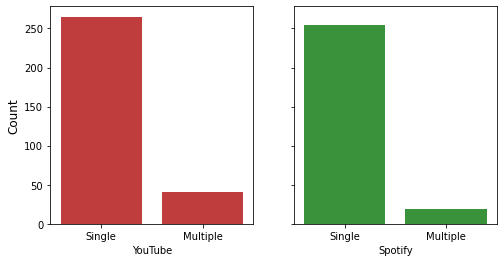

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
channel = ['YouTube', 'Spotify']
for i in range(len(ax)):
    show_channel_tag = df_comb_speaker['channel'] == channel[i]
    sns.barplot(x='speaker_tag', y='duration_min', 
                data=df_comb_speaker[show_channel_tag],
                palette=[palette_comb[i]], ci=95,
                estimator=len,
                ax=ax[i])
    ax[i].set_xlabel(channel[i])
    ax[i].set_ylabel('')
fig.text(0.05, 0.5, 'Count', va='center', rotation='vertical', size=12)


display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.11 Number of Videos or Episodes for Speakers with '
             'Single or Multiple Talks in YouTube and Spotify </b></center>'))

plt.show()

In [28]:
yt_multiple = sorted(list(mult_speakers_yt.index))
display(HTML('<h3>YouTube Speakers with Multiple Shows</h3>'))
for speaker in yt_multiple:
    display(HTML('<li>{}</li>'.format(speaker)))

sp_multiple = sorted(list(mult_speakers_sp.index))
sp_multiple = sorted([speaker.strip() for speaker in sp_multiple])
display(HTML('<h3>Spotify Speakers with Multiple Shows</h3>'))
for speaker in sp_multiple:
    display(HTML('<li>{}</li>'.format(speaker)))

<div style="text-align: justify">We obsert that more than half of them are TED-produced series. This also supports that TED wants variety of speakers in their talks. It is only Bill Gates who are present in both channels.</div>

<div style="text-align: justify">Interestingly, speakers in YouTube who have multiple topics have shorter videos than their counterparts. The reverse is true for Spotify where speakers who have multiple episodes would have longer videos. On the average speakers in either channel would have the same length of about 14 minutes for their talks.</div>

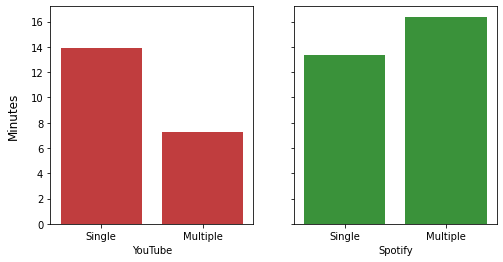

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
channel = ['YouTube', 'Spotify']
for i in range(len(ax)):
    show_channel_tag = df_comb_speaker['channel'] == channel[i]
#     display(df_comb_speaker[df_comb_speaker['channel'] == channel[i]].head())
    sns.barplot(x='speaker_tag', y='duration_min', 
                data=df_comb_speaker[show_channel_tag],
                palette=[palette_comb[i]], ci=None,
                estimator=np.mean,
                ax=ax[i])
    ax[i].set_xlabel(channel[i])
    ax[i].set_ylabel('')
fig.text(0.05, 0.5, 'Minutes', va='center', rotation='vertical', size=12)


display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.12 Length of Videos or Episodes for Speakers with '
             'Single or Multiple Talks in YouTube and Spotify</b></center>'))

plt.show()

<div style="text-align: justify">Engagement in YouTube for more popular speakers are more evident as shown when the speakers based on whether they repeated or not are compared against the other group.</div>

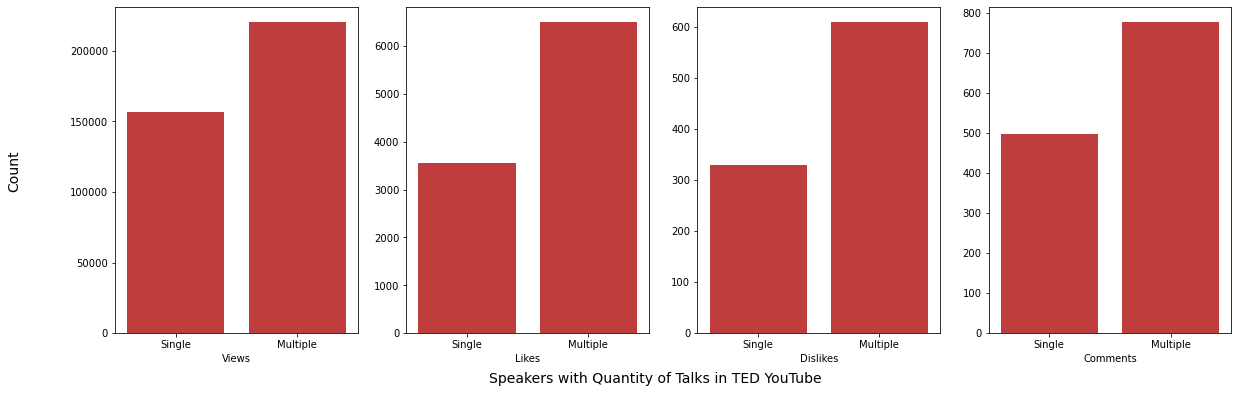

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20,6))
yt_measures_bar = ['viewCount', 'likeCount', 'dislikeCount', 'commentCount']
yt_measures_label = ['Views', 'Likes', 'Dislikes', 'Comments']

for i in range(len(ax)):
    sns.barplot(x='speaker_tag', y=yt_measures_bar[i], data=df_yt_speaker_tag,
                palette=palette_red, estimator=np.mean, ax=ax[i], ci=None)
    ax[i].set_xlabel(yt_measures_label[i])
    ax[i].set_ylabel('')
fig.text(0.5, 0.01, 'Speakers with Quantity of Talks in TED YouTube',
         ha='center', size=14)
fig.text(0.05, 0.5, 'Count', va='center', rotation='vertical', size=14)


display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.13 Engagement Count (Views, Likes, Dislikes and '
             'Comments for Speakers with Single or Multiple Talks in '
             'YouTube</b></center>'))

plt.show()

### 5.5.1 Common Themes from Top Speakers

<div style="text-align: justify">We now analyze any common topics that these speakers or series focus on. We perform this by plotting wordclouds or basically plotting words (or bigrams) that has the highest frequency occuring in titles as the largest word or phrase. For now, we avoid pronouns as we might infer something from the use of it also. Through this, we might be able to infer which topics TED is promoting and if they have differences depending on channel and whether if a speaker has repeated (or it is part of series produced by TED).
</div>

<div style="text-align: justify">For speakers of YouTube who only had one video, what we can see is that topics famous for the last year revolved around 'Covid', 'climate' & 'climate change', the 'future' and 'life' in general. The word 'us' also has high frequency indicating that speakers is utilizing an inclusive approach to its audience.</div>

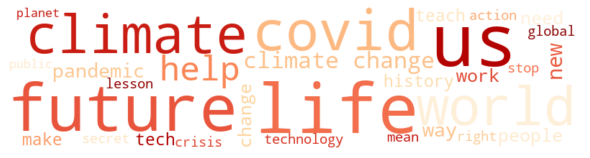

In [31]:
top_words = ''
tokens_list = []
titles = df_yt_speaker_tag[df_yt_speaker_tag.speaker_tag=='Single'].title
for title in titles:
    title = str(title)
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    top_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 200,
                      background_color ='white',
                      colormap='OrRd',
                      max_words=30,
                      collocations=True,
                      min_font_size = 10,
                      max_font_size = 100).generate(top_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.14 Wordcloud for Titles from YouTube Speakers with '
             'a Single Episode</b></center>'))

<div style="text-align: justify">For TED-produced shows and speakers with multiple content in TED's YouTube channel, what we can see is that topics differs in subject that they focused on the topic of 'sleep' and 'money' among others.</div>

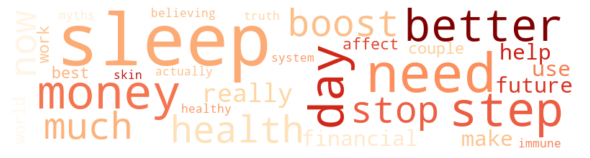

In [32]:
top_words = ''
tokens_list = []
titles = df_yt_speaker_tag[df_yt_speaker_tag.speaker_tag=='Multiple'].title
for title in titles:
    title = str(title)
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    top_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 200,
                      background_color ='white',
                      colormap='OrRd',
                      max_words=30,
                      collocations=True,
                      min_font_size = 10,
                      max_font_size = 100).generate(top_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.15 Wordcloud for Titles from YouTube Speakers with '
             'Multiple Episodes</b></center>'))

<div style="text-align: justify">We see the same trends in spotify who had for speakers who only had one episode featured in the TED channel. The words 'future', 'climate change', and the 'planet' are showing as top words.</div>

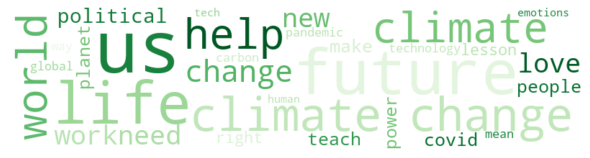

In [33]:
top_words = ''
tokens_list = []
titles = df_sp_speaker_tag[df_sp_speaker_tag.speaker_tag=='Single'].title
for title in titles:
    title = str(title)
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    top_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 200,
                      background_color ='white',
                      colormap='Greens',
                      max_words=30,
                      collocations=True,
                      min_font_size = 10,
                      max_font_size = 100).generate(top_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.16 Wordcloud for Titles from Spotify Speakers with '
             'a Single Episode</b></center>'))

<div style="text-align: justify">Interestingly, the word 'climate' shows up as one of the top words for speakers of Spotify who had multiple stints. Next set of top words varies though these should also be interpreted carefully as there are only few episodes. </div>

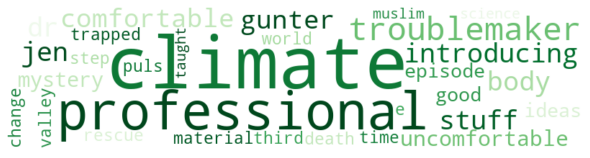

In [34]:
top_words = ''
tokens_list = []
titles = df_sp_speaker_tag[df_sp_speaker_tag.speaker_tag=='Multiple'].title
for title in titles:
    title = str(title)
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    top_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 200,
                      background_color ='white',
                      colormap='Greens',
                      max_words=30,
                      collocations=True,
                      min_font_size = 10,
                      max_font_size = 100).generate(top_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.17 Wordcloud for Titles from Spotify Speakers with '
             'Multiple Episodes</b></center>'))

## 5.6 Top Used Words

### 5.6.1 YouTube

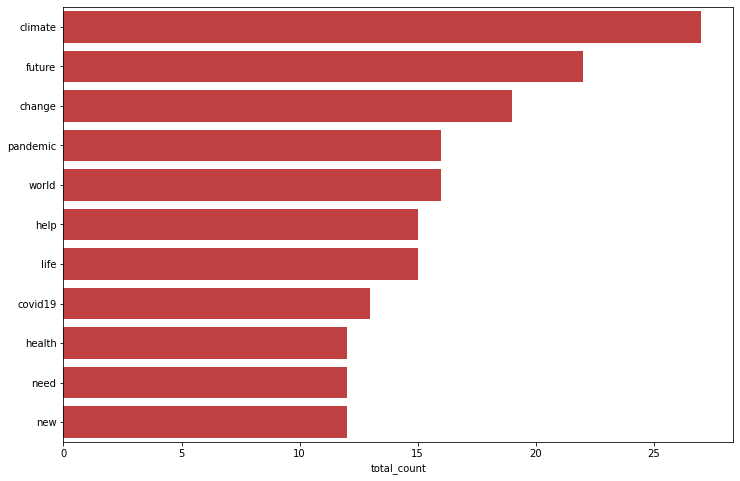

In [35]:
conn = sqlite3.connect('ted_talks.db')
# Initial data frame
df_YT_TW_initial = pd.read_sql('SELECT * from youtube', conn)
df_YT_TW_initial = df_YT_TW_initial[['video_id', 'title', 'published_at', 
                                     'viewCount', 'likeCount', 
                                     'dislikeCount']]

# Distribute word per row
df_YT_TW = df_YT_TW_initial.assign(title=df_YT_TW_initial['title'].\
                                        str.lower().str.split()).\
                                        explode('title')

# Format columns
df_YT_TW['title'] = df_YT_TW['title'].str.replace('[^\w\s]','')
df_YT_TW['published_at'] = (pd.to_datetime(
                                df_YT_TW['published_at'])
                                ).dt.strftime('%b %Y')
df_YT_TW = df_YT_TW.reset_index().iloc[:, 1:]

stop_words = stopwords.words('english')+['could','us','isnt']

# Filtering words
invalid_word_index = []
for i, t in enumerate(df_YT_TW['title']):
    if t in stop_words:
        invalid_word_index.append(i)
            
YT_filter = df_YT_TW.drop(df_YT_TW.index[invalid_word_index])
YT_filter = YT_filter[YT_filter['title'] != '']

df_YT_TW_filtered = pd.pivot_table(YT_filter,
                           index=YT_filter['title'], 
                           columns=YT_filter['published_at'], 
                           aggfunc='size', 
                          fill_value=0)
df_YT_TW_filtered['total_count'] = df_YT_TW_filtered.sum(axis=1)
df_YT_TW_filtered = df_YT_TW_filtered.rename_axis('idx').\
                        sort_values(by = ['total_count', 'idx'], 
                                    ascending = [False, True])

# Top used words bar graph
top10 = df_YT_TW_filtered[:11]
top10_bar = sns.barplot(x='total_count', y=top10.index.values, 
                        data=top10, color='Red', saturation=.5)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.18 Youtube Top 10 Words</b></center>'))

`Climate`, `Change`, and `Future` topped the most common used words on YouTube titles at 27, 22 and 19 mentions respectively. The other most common used words may be bundled and related to the current issue on the pandemic due to the widespread of COVID-19.

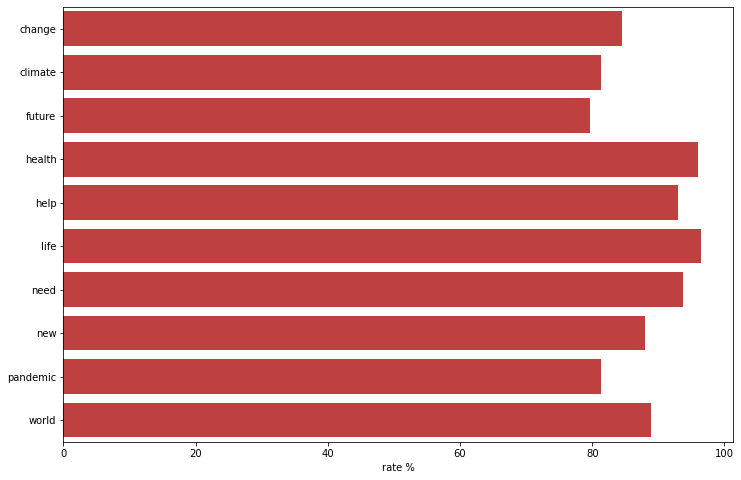

In [36]:
# Get video_id from df_YT_TW_initial with titles in top words
pd.set_option('mode.chained_assignment', None)
df_YT_ratings = df_YT_TW_initial[df_YT_TW_initial['title'].str.lower().\
                                 str.contains('|'.join(top10.index.values))]
df_YT_ratings['word'] = df_YT_ratings['title'].str.lower().str.\
                        findall(r'|'.join(top10.index.values)).\
                        apply(', '.join)

df_YT_ratings = (df_YT_ratings.assign(word=df_YT_ratings['word'].\
                str.split(', ')).explode('word')).reset_index()
df_YT_ratings = df_YT_ratings[['word', 'video_id', 'title', 'viewCount', 
               'likeCount', 'dislikeCount']]

# Ratings bar graph
YT_ratings_pivot = pd.pivot_table(df_YT_ratings, index='word', 
                          values=['viewCount', 'likeCount', 'dislikeCount'],
                          aggfunc='mean')
YT_ratings_pivot['rate %'] = (YT_ratings_pivot['likeCount']/
                              (YT_ratings_pivot['likeCount']+
                               YT_ratings_pivot['dislikeCount']))*100

top10_rate = sns.barplot(x='rate %', y=YT_ratings_pivot.index.values, 
                        data=YT_ratings_pivot, color='Red', saturation=.5)
top10_rate;

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.19 Relative Ratings per Word</b></center>'))

The audience received videos associated with the words `health` and `life` positively, giving them relative ratings at 95.98% and 96.47%. 

In [37]:
# Monthly word trend
monthly_top = []

for month in df_YT_TW_filtered.columns[:-2]:
    for ct in df_YT_TW_filtered[month]:
        if ct == df_YT_TW_filtered[month].max():
            idx_name = df_YT_TW_filtered[
                        df_YT_TW_filtered[month]==ct
                        ].index.values.tolist()
            valid_entry = (month, idx_name, ct)
            monthly_top.append(valid_entry)
            
monthly_YT_trend = pd.DataFrame(monthly_top, columns=['month', 
                                                      'top_word', 'count'])
monthly_YT_trend['month'] = pd.to_datetime(monthly_YT_trend['month'])
monthly_YT_trend = monthly_YT_trend.\
                assign(top_word=[i for i in monthly_YT_trend['top_word']]).\
                explode('top_word')
monthly_YT_trend = monthly_YT_trend.sort_values('month', ascending=True)
monthly_YT_trend = monthly_YT_trend.drop_duplicates().\
                    reset_index().iloc[:, 1:]

fig = px.scatter(monthly_YT_trend, x='month', y=None, 
                 size='count', 
                 hover_name='top_word',
                 color='top_word',
                labels={'month' : 'Month_Year'},
                color_continuous_scale='reds')

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.20 Monthly Word Trend</b></center>'))

### 5.6.2 Spotify

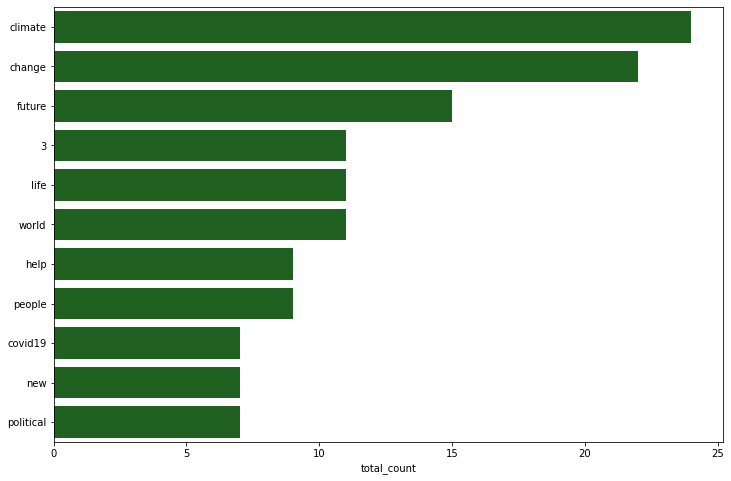

In [38]:
# Initial data frame
df_S_TW_initial = pd.read_sql('SELECT * from spotify', conn)
df_S_TW_initial = df_S_TW_initial[['title', 'date_released']]

# Distribute word per row
df_S_TW = df_S_TW_initial.assign(title=df_S_TW_initial['title'].\
                                        str.lower().str.split()).\
                                        explode('title')

# Format columns
df_S_TW['title'] = df_S_TW['title'].str.replace('[^\w\s]','')
df_S_TW['date_released'] = (pd.to_datetime(
                                df_S_TW['date_released'])
                                ).dt.strftime('%b %Y')
df_S_TW = df_S_TW.reset_index().iloc[:, 1:]

stop_words = stopwords.words('english')+['could','us','isnt']

# Filtering words
invalid_word_index = []
for i, t in enumerate(df_S_TW['title']):
    if t in stop_words:
        invalid_word_index.append(i)
            
S_filter = df_S_TW.drop(df_S_TW.index[invalid_word_index])
S_filter =S_filter[S_filter['title'] != '']

df_S_TW_filtered = pd.pivot_table(S_filter,
                           index=S_filter['title'], 
                           columns=S_filter['date_released'], 
                           aggfunc='size', 
                          fill_value=0)
df_S_TW_filtered['total_count'] = df_S_TW_filtered.sum(axis=1)
df_S_TW_filtered = df_S_TW_filtered.rename_axis('idx').\
                        sort_values(by = ['total_count', 'idx'], 
                                    ascending = [False, True])

# Top used words bar graph
top10 = df_S_TW_filtered[:11]
top10_bar = sns.barplot(x='total_count', y=top10.index.values, 
                        data=top10, color='Green', saturation=.5)

display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.21 Spotify Top 10 Words</b></center>'))

In [39]:
# Monthly word trend
monthly_top = []

for month in df_S_TW_filtered.columns[:-2]:
    for ct in df_S_TW_filtered[month]:
        if ct == df_S_TW_filtered[month].max():
            idx_name = df_S_TW_filtered[
                        df_S_TW_filtered[month]==ct
                        ].index.values.tolist()
            valid_entry = (month, idx_name, ct)
            monthly_top.append(valid_entry)
            
monthly_S_trend = pd.DataFrame(monthly_top, columns=['month', 
                                                      'top_word', 'count'])
monthly_S_trend['month'] = pd.to_datetime(monthly_S_trend['month'])
monthly_S_trend = monthly_S_trend.\
                assign(top_word=[i for i in monthly_S_trend['top_word']]).\
                explode('top_word')
monthly_S_trend = monthly_S_trend.sort_values('month', ascending=True)
monthly_S_trend = monthly_S_trend.drop_duplicates().\
                    reset_index().iloc[:, 1:]

fig = px.scatter(monthly_S_trend, x='month', y=None, 
                 size='count', 
                 hover_name='top_word',
                 color='top_word', 
                labels={'month' : 'Month_Year'},
                color_continuous_scale='greens')

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.show()
display(HTML('<center style="font-size:12px;font-style:default;">'
             '<b>Figure 5.22 Monthly Word Trend</b></center>'))



June 2020 consists of single used words because TED has just began uploading their podcast on Spotify at that time. Additionally, unlike in YouTube, common used words on Spotify cannot be linked together to form a certain topic like the widespread of COVID-19.

## 6. Conclusion and Recommendation


<div style="text-align: justify"><b>TED</b> is a great avenue for speakers to showcase their ideas and expertise in different fields such as science, business, tech, and education. Aside from their on-site talks and symposiums, their  presence is felt online through two main digital channels -- YouTube and Spotify. </div>
<br>

<div style="text-align: justify">The group found that there is a mismatch between uploads in YouTube and Spotify in terms of count. It is evident that TED prioritizes fresher content in Spotify rather than YouTube due to the fact that is easier to edit videos than pure audio(audio requires extraction from videos and audio signal processing). TED also uploads on Spotify before YouTube.  </div>
<br>

<div style="text-align: justify">As far as length or duration is concerned, Spotify uploads are longer mostly due to embedded advertisements.  Majority of video and podcasts fall between the 1-20 minute duration. Those present in both platforms show increase in engagement (likes, views, shares) as the video length increases. This suggests that viewers are still engaged even if the content is longer. Meanwhile, 
those present only on YouTube show higher engagement for specific video length of 2-6 minutes. This shows that viewers prefer shorter video lengths. </div>
<br>

<div style="text-align: justify">Engagement-wise,videos that are uploaded in YouTube only have a higher view count (around 20,000 more) and more likes (around 500) more than the content that are present in both YouTube and Spotify. There is no significant difference for dislike and comment counts. The low correlation between a TED Talk's YouTube's engagement statistics and its presence in Spotify as a podcast suggests that TED does not incorporate a video's success in YouTube in its decision to upload the the audio version of it on Spotify</div>
<br>

<div style="text-align: justify">We recommend that TED sticks to their current upload timing so that the delay is much lower than if they were doing it the other way around. TED can take advantage of the insights on content duration by uploading shorter videos for YouTube-only content and make sure that longer videos are also uploaded as podcasts in their Spotify channel. The company can look into more talks that are environment-centered and health/life-related since top words include climate change as well as future, and health/life that were highly rated by audiences. TED can also consider hosting more events or talks that are of similar profile to Former President Bill Gates and Environmentalist Achim Steiner since their content were well-received online.</div>
<br>

<div style="text-align: justify">We also found out that YouTube speakers who have a second set of talks in YouTube, while they are longer, have higher engagement frequency. This is true even if the topics deviate from the usual topics of TED. This might also reflect the expertise of these repeat speakers given that they have longer than usual duration as evidenced by their video length.</div>
<br>

<div style="text-align: justify">In further studies of TED Spotify and YouTube data, researchers can extend the dates and possibly explore more features so as to derive more useful insights. They can also compare other similar accounts that are present in both platforms. Possible next steps include performing machine learning algorithms to assess the expected views of TED content, possible content recommendation algorithms(speaker topics), and other relevant analyses.</div>

## 7. References

We would like to acknowledge our references for this study:
- TED website, (n.d). https://www.ted.com/about/our-organization
- Wikipedia (n.d.). https://en.wikipedia.org/wiki/TED_(conference)
- API Reference  |  YouTube Data API  |  Google Developers. (n.d.). Retrieved from https://developers.google.com/youtube/v3/docs
- Web API. (n.d.). Retrieved from https://developer.spotify.com/documentation/web-api/
- TED. (2019). In YouTube. https://www.youtube.com/user/TEDtalksDirector
- TED Talks Daily. (n.d.). Spotify. Retrieved August 10, 2021, from https://open.spotify.com/show/1VXcH8QHkjRcTCEd88U3ti
